# CCFDetector: Using ML against Credit Card Frauds

L'obiettivo di questo progetto, realizzato per l'esame di Fondamenti di Intelligenza Artificiale presso l'Univeristà degli Studi di Salerno, è quello di realizzare un sistema di Machine Learning per l'individuazione di transazioni fraudolente relative ai pagamenti elettronici, cioè tutte quelle transazioni effettuate da carte di credito non in possesso dell'autore della transazione.
## Setup del progetto e Data Understanding
---
### Inizio ad importare le librerie necessarie

In [18]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

### Carico il dataset

In [19]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Descrizione del dataset
Il dataset utilizzato, contiene le transazioni effettuate da carte di credito in due giorni del settembre del 2013. Molte delle features (da *V1* a *V28*) sono riservate, ovviamente, per motivi di privacy. Le uniche features che non sono state nascoste sono *Time*, che rappresenta il tempo, in secondi, tra la transazione corrispondente e la prima transazione del dataset, *Amount*, che rappresenta l'ammontare, appunto, della transazione, e, infine, *Class*, che assume valore 1 se la transazione è stata segnalata come fraudolenta, 0 altrimenti. 
Vado, ora, ad analizzare il dataset per verificare se sia *unbalanced*, come mi aspetto, oppure no e controllo se ci sono valori null.

In [20]:
# Checking n. of frauds in the dataset
fraud = dataset[dataset['Class'] == 1]
valid = dataset[dataset['Class'] == 0]
ratio = len(fraud)/float(len(valid))
print(ratio)
print('Fraud cases: {}'.format(len(dataset[dataset['Class'] == 1])))
print('Valid cases: {}'.format(len(dataset[dataset['Class'] == 0])))

# Checking null values using isna() method
nan_mask = dataset.isna()
nan_count = nan_mask.sum().max()
print('Max number of NaNs: {}'.format(nan_count))


0.0017304750013189597
Fraud cases: 492
Valid cases: 284315
Max number of NaNs: 0


Non ci sono valori null ma, come possiamo notare, il dataset è altamente *unbalanced*; infatti, solo lo 0.17% delle transazioni risulta essere etichettato come fraudolento.

Utilizzo la libreria *seaborn* per visualizzare la distribuzione delle due classi:

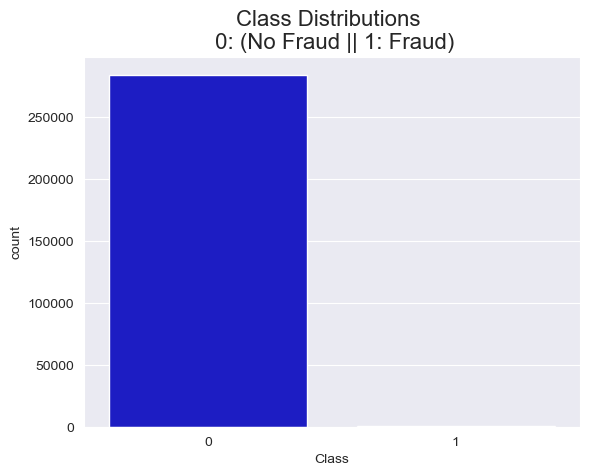

In [44]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=dataset, palette=colors)
plt.title('Class Distributions \n 0: (No Fraud || 1: Fraud)', fontsize=16)
plt.show()

Proseguo analizzando i dettagli relativi alla quantità di denaro utilizzata nelle transazioni fraudolente e nelle transazioni lecite.

In [45]:
print("Dettagli di Amount nelle transazioni fraudolente")
fraud.Amount.describe()

Dettagli di Amount nelle transazioni fraudolente


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [46]:
print("Dettagli di Amount nelle transazioni non fraudolente")
valid.Amount.describe()

Dettagli di Amount nelle transazioni non fraudolente


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Come si può ben notare, le cifre relative alle transazioni fraudolente sono più alte, con una media di 122.2 per le transazioni fraudolente, contro gli 88.2 delle transazioni non fraudolente.
A questo punto, per avere un'idea di come le varie caratteristiche sono correlate tra loro e di quali risultano più rilevanti per la predizione, utilizzo una *matrice di correlazione*.

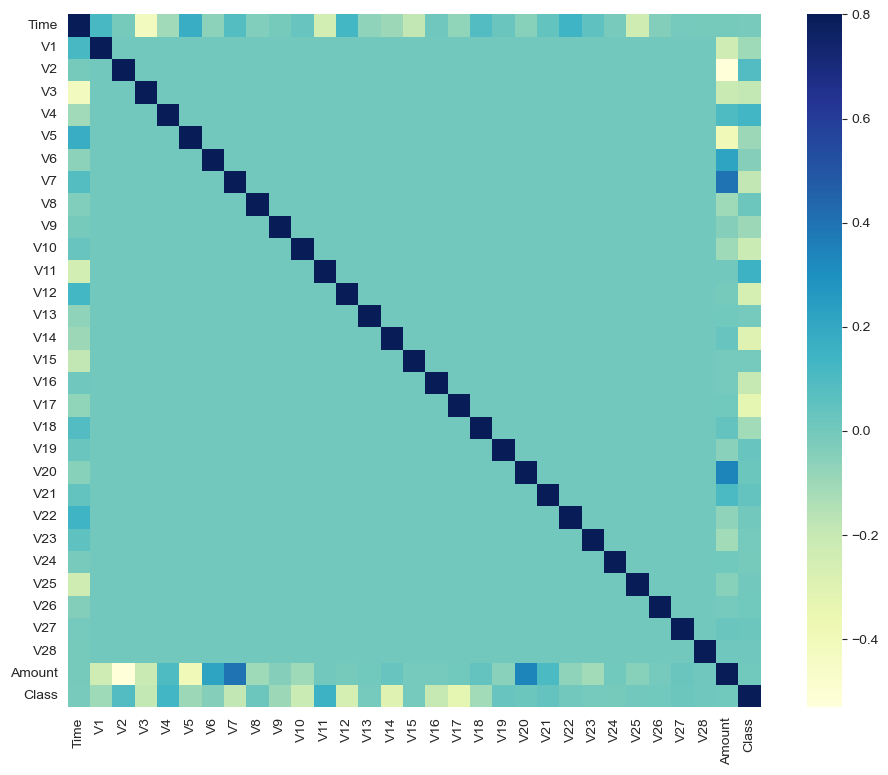

In [72]:
# Plotting a Correlation Matrix
correlation_matrix = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, vmax = .8, square = True, cmap = 'YlGnBu')
plt.show()

Questa matrice di correlazione mostra come le caratteristiche V7 e V20 hanno una qualche correlazione con l'ammontare di denaro relativo ad una transazione (*Amount*), mentre altre caratteristiche, ad esempio V2, V3 e V5 sono negativamente correlate con questa caratteristica. Tuttavia, essendo il dataset molto sbilanciato, è possibile che non riusciamo a trovare le reali correlazioni tra le varie caratteristiche, dunque, terminato il bilanciamento, andremo a confrontare questa matrice di confusione con quella che verrà generata in seguito.

## Data Preparation
---
### Feature Scaling
Come visto precedentemente, le caratteristiche V1, ..., V28, sono state scalate quando è stata effettuata la trasformazione PCA, mentre le uniche caratteristiche che non sono state soggette a tale trasformazione sono *Time* e *Amount*. Osservandone i valori, questi si discostano di molto da quelli delle features che risultano essere state già scalate. Per poter scegliere quale *scaler* utilizzare, vado ad osservare la distribuzione dei valori delle due features considerate.

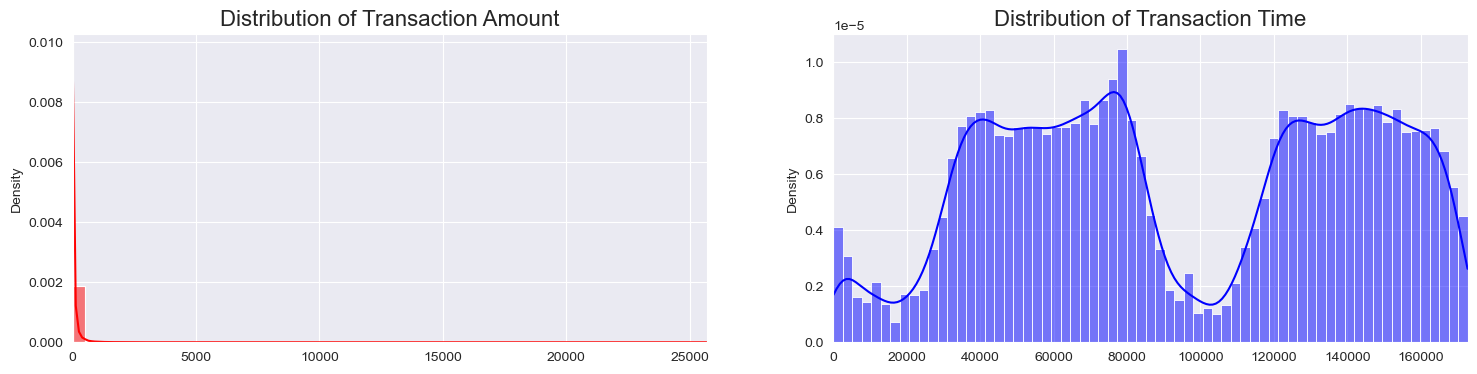

In [74]:
# Generating distribution histrograms

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

# Distribution of Amount 
sns.histplot(amount_val, ax=ax[0], color='r', stat='density', common_norm=False, bins=50, kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=16)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Distribution of Time
sns.histplot(time_val, ax=ax[1], color='b', stat='density' , kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=16)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Come possiamo osservare, la distribuzione dei valori di *Amount* è fortemente asimmetrica a destra: la maggior parte delle transazioni ha importi relativamente bassi, mentre poche sono le transazioni che hanno importi più alti (outliers).
Per questa ragione, utilizziamo lo scaler **RoubstScaler** della libreria *scikit-learn*. Infatti, questo scaler risulta essere particolarmente appropriato per situazioni in cui la distribuzione dei dati è asimmetrica e in cui, dunque, ci sono outliers.

A questo punto, creo un nuovo DataFrame *X*, che contiene le variabili indipendenti (*features*), andando a rimuovere la colonna *Class* dal DataFrame originale e una Serie *Y*, che contiene la variabile dipendente (*target*), nonché la colonna *Class*.  

In [48]:
# Separating dependent variable Y from the indipendent variables
X = dataset.drop(['Class'], axis=1) # indipendent variables
Y = dataset['Class'] # target

print(X.shape)
print(Y.shape)

# Converting X and Y into numpy arrays
xData = X.values
yData = Y.values
# print("Printing the arrays...")
# print(xData)
# print(yData)

(284807, 30)
(284807,)


Affinché il modello risulti affidabile, è necessario che il dataset con cui viene addestrato sia diverso dal dataset con cui verrà validato.
Dunque, è necessario dividere il dataset in un *Training Set* e un *Test set*.
Efettuerò una singola divisione del dataset, in particolare utilizzerò il 20% dei dati come Test set.

In [8]:
# Splitting data into training set and test set using Scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    xData, yData, test_size=0.2, random_state=42)

## Implementazione e valutazione del classificatore Naive Bayes
---
### Costruzione del modello

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)
print(predicted)

[1 0 0 ... 0 0 0]


### Valutazione del modello

In [33]:
from sklearn.metrics import confusion_matrix 
# Visualizing the Confusion Matrix
LABELS = ['Normal', 'Fraud']
confusion = confusion_matrix(y_test, predicted)
plt.figure(figsize=(12, 12))
sns.heatmap(confusion, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

NameError: name 'predicted' is not defined

La Matrice di Confusione mostra i seguenti dati:
- Numero di TN = 56502
- Numero di FP = 362
- Numero di FN = 36
- Numero di TP = 62
A questo punto, posso calcolare le varie metriche quali: **accuracy**, **precision**, **recall**, **F1** e **MCC**.

In [24]:
# Classifier Evaluation
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 

print("Model used: Gaussian Naive Bayes")
n_outliers = len(fraud) 
n_errors = (predicted != y_test).sum()

accuracy = accuracy_score(y_test, predicted)
print("The accuracy is {}".format(accuracy))

precision = precision_score(y_test, predicted)
print("The precision is {}".format(precision))

recall = recall_score(y_test, predicted)
print("The recall is {}".format(recall))

f1 = f1_score(y_test, predicted)
print("The f1 is {}".format(f1))

MCC = matthews_corrcoef(y_test, predicted)
print("The Matthews correlation coefficient is {}".format(MCC))

Model used: Gaussian Naive Bayes
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898
The f1 is 0.2375478927203065
The Matthews correlation coefficient is 0.3019617859258202


Come mostrato dalla metrica *precision*, solo il 14.6% delle predizioni positive risulta essere effettivamente positiva, mentre le restanti predizioni positive sono dei *False Positives*.
Come mostra *recall*, il 63,2% delle istanze positive è stato rilevato correttamente.
F1 e MCC, inoltre, risultano essere piuttosto bassi.


## Implementazione e valutazione del classificatore Decision Tree
---
Costruzione del modello